## graphml2heatmap.ipynb

This notebook transforms a graphml file (of the type produced by https://github.com/SuLab/genewikiworld) and creates a heatmap visualization

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
G = nx.read_graphml('../data/wikidata-update-2019-09-27b_simplified_thicklines_noprops.graphml')
G

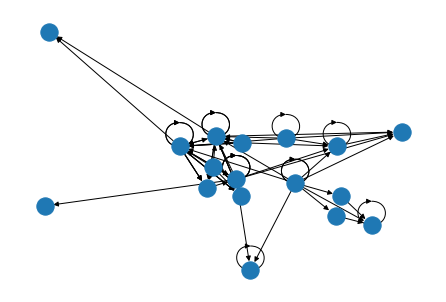

In [3]:
nx.draw(G)

In [4]:
# inspect nodes
for node in G.nodes(data=True):
    print(node)


('n0', {'node_type': 'detail', 'node_prop_text': 'MonDO ID: 11,914\nUMLS CUI: 11,441\nDisease Ontology ID: 9,509\nICD-10-CM: 6,805\nOrphanet ID: 6,745\nMeSH descriptor ID: 6,019\nOMIM ID: 5,975\nMeSH code: 3,325\nGARD rare disease ID: 2,984\nFreebase ID: 2,601\nDiseasesDB: 2,099\nICD-10: 1,801\nJSTOR topic ID: 1,593\nICD-9: 1,554\neMedicine: 1,472\nEncyclopædia Britannica Online ID: 1,398\nHuman Phenotype Ontology ID: 1,125\nMedlinePlus ID: 1,105\nQuora topic ID: 934', 'labelcount': 'disease\n17,080', 'NodeLabel': 'disease', 'label': 'disease\n17,080', 'URL': 'https://www.wikidata.org/wiki/Q12136', 'P3417': 934, 'P3841': 1125, 'P1417': 1398, 'P604': 1105, 'P493': 1554, 'P673': 1472, 'P3827': 1593, 'P494': 1801, 'P557': 2099, 'P646': 2601, 'P4317': 2984, 'P672': 3325, 'P492': 5975, 'P1550': 6745, 'P486': 6019, 'P4229': 6805, 'P699': 9509, 'P2892': 11441, 'P5270': 11914, 'count': 17080, 'shape_type': 'ShinyPlateNodeWithShadow', 'x': '23.260645947606577', 'y': '1510.9335890755037'})
('n1'

In [5]:
# inspect edges 

for edge in G.edges(data=True):
    print(edge)


('n0', 'n0', {'labelcount': 'subclass of (41,199)', 'URL': 'https://www.wikidata.org/wiki/Property:P279', 'pid': 'P279', 'label': 'subclass of (41,199)', 'count': 41199})
('n0', 'n0', {'labelcount': 'instance of (2,335)', 'URL': 'https://www.wikidata.org/wiki/Property:P31', 'pid': 'P31', 'label': 'instance of (2,335)', 'count': 2335})
('n0', 'n0', {'labelcount': 'symptoms (685)', 'URL': 'https://www.wikidata.org/wiki/Property:P780', 'pid': 'P780', 'label': 'symptoms (685)', 'count': 685})
('n0', 'n3', {'labelcount': 'drug used for treatment /\nmedical condition treated (6,823)', 'URL': 'https://www.wikidata.org/wiki/Property:P2176', 'pid': 'P2176', 'label': 'drug used for treatment /\nmedical condition treated (6,823)', 'count': 6823})
('n0', 'n4', {'labelcount': 'drug used for treatment /\nmedical condition treated (9,626)', 'URL': 'https://www.wikidata.org/wiki/Property:P2176', 'pid': 'P2176', 'label': 'drug used for treatment /\nmedical condition treated (9,626)', 'count': 9626})
('

In [6]:
# transform graph data into data frame

numOfRows=10
data = []

for edge in G.edges(data=True):
    data.append([G.nodes[edge[0]]['NodeLabel'],G.nodes[edge[1]]['NodeLabel'],edge[2]['count']])

df = pd.DataFrame(data,columns=["Node1","Node2","count"])
df


,Node1,Node2,count
0,disease,disease,41199
1,disease,disease,2335
2,disease,disease,685
3,disease,chemical compound,6823
4,disease,medication,9626
...,...,...,...
58,biological pathway,gene,30332
59,biological pathway,biological pathway,2278
60,biological pathway,taxon,2979
61,pharmacologic action,disease,1112


In [7]:
# get full list of unique node types

nodes = np.sort(pd.unique(df[['Node1', 'Node2']].values.ravel()))
nodes

array(['active site', 'anatomical structure', 'binding site',
       'biological pathway', 'chemical compound', 'disease', 'gene',
       'mechanism of action', 'medication', 'pharmaceutical product',
       'pharmacologic action', 'protein', 'protein family',
       'sequence variant', 'symptom', 'taxon', 'therapeutic use'],
      dtype=object)

In [8]:
# create output dataframe with edge counts

df2 = pd.DataFrame(0,nodes,nodes)
df2

,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
active site,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anatomical structure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
binding site,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
biological pathway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chemical compound,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
disease,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gene,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mechanism of action,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
medication,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
pharmaceutical product,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# populate output data frame df2 (combine edges of with different predicates, in opposite directions)

for i,j in df.iterrows():
    if( j['Node1'] > j['Node2'] ):
        df2.at[j['Node1'],j['Node2']] = df2.at[j['Node1'],j['Node2']] + j['count']
    else:
        df2.at[j['Node2'],j['Node1']] = df2.at[j['Node2'],j['Node1']] + j['count']

# remove negative values (from when SPARQL query times out, count is set to -1)
df2[df2 < 0] = 0

df2

,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
active site,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anatomical structure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
binding site,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
biological pathway,0,0,0,2278,0,0,0,0,0,0,0,0,0,0,0,0,0
chemical compound,0,0,0,3665,2367,0,0,0,0,0,0,0,0,0,0,0,0
disease,0,959,0,0,6823,44219,0,0,0,0,0,0,0,0,0,0,0
gene,0,0,0,30332,0,13614,0,0,0,0,0,0,0,0,0,0,0
mechanism of action,0,0,0,0,2307,0,0,0,0,0,0,0,0,0,0,0,0
medication,0,0,0,1055,2996,11623,0,1418,4223,0,0,0,0,0,0,0,0
pharmaceutical product,0,0,0,0,2164,1505,0,0,3030,0,0,0,0,0,0,0,0


In [10]:
def pretty_round(a, digits=0):
    if( str(type(a)) == "<class 'pandas.core.series.Series'>" ):
#        print("A")
        out = []
        for i in a:
#            print("B: "+str(i))
            out.append(pretty_round(i))
        return(out)
    if(not isinstance(a,int)):
        return None
    i=0
    while(int(a)>=1e3):
       a/=1e3
       i+=1
    return str(int(round(a,digits)))+" kMBT"[i]

In [11]:
df2Label = df2.apply(pretty_round)
df2Label

,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
active site,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anatomical structure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
binding site,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
biological pathway,0,0,0,2k,0,0,0,0,0,0,0,0,0,0,0,0,0
chemical compound,0,0,0,4k,2k,0,0,0,0,0,0,0,0,0,0,0,0
disease,0,959,0,0,7k,44k,0,0,0,0,0,0,0,0,0,0,0
gene,0,0,0,30k,0,14k,0,0,0,0,0,0,0,0,0,0,0
mechanism of action,0,0,0,0,2k,0,0,0,0,0,0,0,0,0,0,0,0
medication,0,0,0,1k,3k,12k,0,1k,4k,0,0,0,0,0,0,0,0
pharmaceutical product,0,0,0,0,2k,2k,0,0,3k,0,0,0,0,0,0,0,0


In [12]:
# perform log10 transformation

df3 = np.log10(df2 + 1)
df3

,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
active site,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
anatomical structure,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
binding site,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
biological pathway,0.000000,0.000000,0.000000,3.357744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
chemical compound,0.000000,0.000000,0.000000,3.564192,3.374382,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
disease,0.000000,2.982271,0.000000,0.000000,3.834039,4.645619,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
gene,0.000000,0.000000,0.000000,4.481915,0.000000,4.134018,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
mechanism of action,0.000000,0.000000,0.000000,0.000000,3.363236,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
medication,0.000000,0.000000,0.000000,3.023664,3.476687,4.065356,0.000000,3.151982,3.625724,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
pharmaceutical product,0.000000,0.000000,0.000000,0.000000,3.335458,3.177825,0.000000,0.000000,3.481586,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [13]:
df4 = df3
df4[df4==0] = None
df4

,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
active site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anatomical structure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
binding site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
biological pathway,NaN,NaN,NaN,3.357744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chemical compound,NaN,NaN,NaN,3.564192,3.374382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disease,NaN,2.982271,NaN,NaN,3.834039,4.645619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene,NaN,NaN,NaN,4.481915,NaN,4.134018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mechanism of action,NaN,NaN,NaN,NaN,3.363236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medication,NaN,NaN,NaN,3.023664,3.476687,4.065356,NaN,3.151982,3.625724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pharmaceutical product,NaN,NaN,NaN,NaN,3.335458,3.177825,NaN,NaN,3.481586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

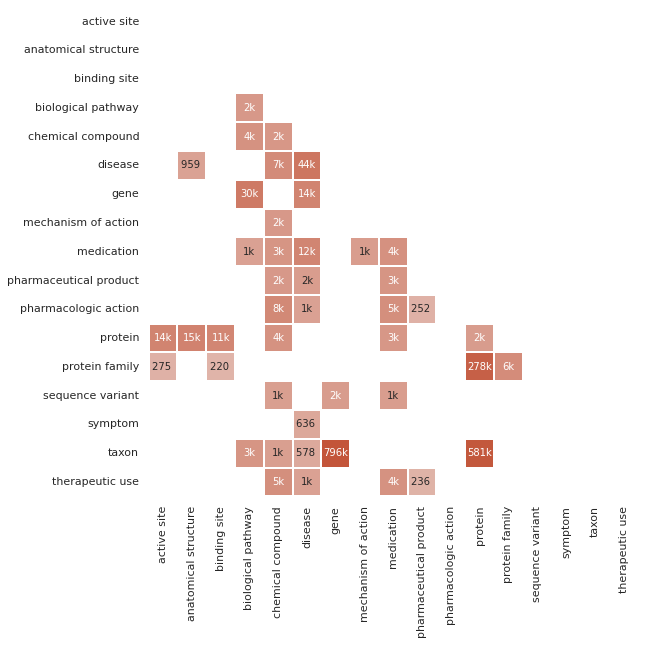

In [14]:
# create plot

sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.zeros_like(df3)
mask[np.triu_indices_from(mask,k=1)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df4, 
            cmap=cmap, 
#            vmax=100, 
            mask=mask,
            annot=df2Label,
            annot_kws={"size": 10},
            fmt="",
            center=0,
            square=True, 
            linewidths=2, 
            cbar=False,
        )